<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2); line-height: 1.5;">
    <center style="color:white;font-size:35px;padding:15px"><b> ĐỒ ÁN CUỐI KỲ </b></center>
<center style="color:black;font-size:30px;padding:15px"><b> LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</b></center>
</div>


## Import các thu viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Khám phá dữ liệu

### Đọc dữ liệu vào dataframe

In [2]:
df = pd.read_csv('../Data/who_life_exp.csv')

In [3]:
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


## 2. Tiền xử lí dữ liệu

### Có bao nhiêu dòng và bao nhiêu cột của tập dữ liệu?

In [4]:
num_rows, num_columns = df.shape
print(f'Bộ dữ liệu có {num_rows} dòng và {num_columns} cột.')

Bộ dữ liệu có 3111 dòng và 32 cột.


### Ý nghĩa của từng dòng dữ liệu là gì?

Mỗi dòng thể hiện số liệu giá trị cho từng cột được thu thập được từ WHO, có thể ở một số cột sẽ không có số liệu vì chưa thu thập được. Có tổng cộng 3111 dòng số liệu.



### Có dòng nào bị trùng lặp không?

In [5]:
duplicated_rows = df[df.duplicated()]

if duplicated_rows.empty:
    print("Không có dòng trùng lặp.")
else:
    print("Có dòng trùng lặp.")

Không có dòng trùng lặp.


### Ý nghĩa của từng cột dữ liệu là gì?

| Tên cột | Ý nghĩa của cột | 
|:---------|:-----------------|
| ***country*** | Tên quốc gia |
| ***country_code*** | Mã định danh quốc gia gồm 3 chữ cái |
| ***region*** | Khu vực của quốc gia |
| ***year*** | Năm |
| ***life_expect*** | Tuổi thọ trung bình trong năm |
| ***life_exp60*** | Tỉ lệ dân số có tuổi thọ 60+ |
| ***adult_mortality*** | Tỷ lệ tử vong ở người trưởng thành của cả 2 giới (xác suất tử vong từ 15 đến 60 tuổi trên 1000 dân số)|
| ***infant_mort*** | Tỷ lệ tử vong đến 1 tuổi |
| ***age1-4mort*** | Tỷ lệ tử vong trong độ tuổi từ 1 đến 4 |
| ***alcohol*** | Rượu, mức tiêu thụ bình quân đầu người (15+) được ghi nhận (tính bằng lít rượu nguyên chất) |
| ***bmi*** | BMI trung bình (kg/m^2) (18+) (ước tính theo tuổi được chuẩn hóa) |
| ***age5-19thinness*** | Tỷ lệ gầy ở trẻ em và thanh thiếu niên, BMI < (trung bình - 2s.d.) (ước tính thô) (%) |
| ***age5-19obesity*** | Tỷ lệ béo phì ở trẻ em và thanh thiếu niên, BMI > (trung bình + 2s.d.) (ước tính thô) (%) |
| ***hepatitis*** | Tỷ lệ tiêm chủng viêm gan B (HepB) ở trẻ 1 tuổi (%) |
| ***measles*** | Tỷ lệ tiêm ngừa vắc xin sởi mũi 1 (MCV1) ở trẻ 1 tuổi (%) |
| ***polio*** | Tỷ lệ tiêm chủng bại liệt (Pol3) ở trẻ 1 tuổi (%) |
| ***diphtheria*** | Tỷ lệ tiêm chủng giải độc tố uốn ván và ho gà (DTP3) cho trẻ 1 tuổi (%) |
| ***basic_water*** | Tỷ lệ dân số sử dụng các loại nước uống cơ bản |
| ***doctors*** | Số bác sĩ y khoa (trên 10.000 dân) |
| ***hospitals*** | Mật độ bệnh viện trên 100.000 dân |
| ***gni_capita*** | Tổng thu nhập quốc dân trên đầu người |
| ***gghe-d*** | Chi tiêu chung cho y tế của chính phủ trong nước (GGHE-D) tính theo phần trăm tổng sản phẩm quốc nội (GDP) |
| ***che_gdp*** | Chi tiêu cho y tế hiện tại (CHE) tính theo phần trăm tổng sản phẩm quốc nội (GDP) (%) |
| ***une_pop*** | Dân số (hàng nghìn) |
| ***une_infant*** | Số ca tử vong trung bình ở trẻ sơ sinh (trên 1.000 trẻ đẻ sống) |
| ***une_life*** | Tuổi thọ trung bình theo UNESCO (năm) |
| ***une_hiv*** | Tỷ lệ nhiễm HIV (% dân số từ 15-49 tuổi) |
| ***une_gni*** | GNI bình quân đầu người theo UNESCO (đô la quốc tế hiện tại) |
| ***une_poverty*** | Tỷ lệ nghèo đói ở mức 1,90 đô la một ngày (PPP) (% dân số) |
| ***une_edu_spend*** | Chi tiêu của chính phủ cho giáo dục tính theo tỷ lệ phần trăm của GDP (%) |
| ***une_literacy*** | Tỷ lệ người lớn biết chữ, dân số trên 15 tuổi, cả hai giới (%) |
| ***une_school*** | Số năm đi học trung bình (ISCED 1 trở lên), dân số từ 25 tuổi trở lên, cả hai giới |

### Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?

In [6]:
df.info() #In ra kieu du lieu cua moi cot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

Không có kiểu dữ liệu nào không phù hợp

### Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

#### Phần trăm giá trị còn thiếu là bao nhiêu?

In [7]:
# Hàm tính phần trăm giá trị bị thiếu bằng cách lấy 1 trừ phần trăm giá trị hiện có trong cột so với gia trị lớn nhất của dataframe
def missing_values(cols,df):
    missing_percentage = 1 - cols.count() / len(df)
    return missing_percentage
# print(missing_values(df.select_dtypes(include='number'),df))
missing_percentage_df = missing_values(df.select_dtypes(include='number'),df)
# Chuyển kết quả về dạng dataframe rồi in ra
missing_percentage_df = pd.DataFrame({'Missing percentage': missing_percentage_df })
print(missing_percentage_df)

                 Missing percentage
year                       0.000000
life_expect                0.000000
life_exp60                 0.000000
adult_mortality            0.000000
infant_mort                0.000000
age1-4mort                 0.000000
alcohol                    0.016072
bmi                        0.010929
age5-19thinness            0.010929
age5-19obesity             0.010929
hepatitis                  0.182899
measles                    0.006107
polio                      0.006107
diphtheria                 0.006107
basic_water                0.010286
doctors                    0.427837
hospitals                  0.958213
gni_capita                 0.219222
gghe-d                     0.032144
che_gdp                    0.037608
une_pop                    0.011893
une_infant                 0.000000
une_life                   0.000000
une_hiv                    0.238187
une_gni                    0.037608
une_poverty                0.706525
une_edu_spend              0

#### Giá trị nhỏ nhất? Giá trị lớn nhất? Các giá trị này có gì bất thường không?

In [8]:
# In ra các giá trị min, max trong từng cột số numeric
numeric_df = df.select_dtypes(include='number')
rs = {
     'Min' : numeric_df.min(),
     'Max': numeric_df.max()
}
result = pd.DataFrame(rs)
result

,Min,Max
year,2000.000000,2.016000e+03
life_expect,36.227360,8.416616e+01
life_exp60,10.728000,2.639402e+01
adult_mortality,49.201850,6.968742e+02
infant_mort,0.001470,1.645150e-01
age1-4mort,0.000065,3.909500e-02
alcohol,0.000000,2.018246e+01
bmi,19.800000,3.220000e+01
age5-19thinness,0.100000,2.810000e+01
age5-19obesity,0.100000,2.670000e+01


Giá trị lớn nhất của các cột bị tràn số

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

#### Tỉ lệ (%) giá trị thiếu của mỗi cột là bao nhiêu? Mỗi cột có bao nhiêu giá trị khác nhau? Hiển thị 1 vài giá trị

In [9]:
pd.set_option('display.max_colwidth', 100) # Dễ xem
pd.set_option('display.max_columns', None) # Dễ xem

In [13]:
cat_col_info_df = df.select_dtypes(exclude=[np.number])

# Hàm tính tỉ lệ giá trị thiếu
# Lấy số giá trị thiếu chia cho số dòng của mỗi cột
def missing_ratio(column):
    return ((column.isnull().sum() / column.shape[0]) * 100).round(1)

# Hàm tính số lượng giá trị khác nhau
def num_diff_values(column):
    return column.nunique()

# Hàm trả về các giá trị khác nhau
def diff_values(column):
    return column.dropna().unique()

# Hiển thị
cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_diff_values, diff_values])
cat_col_info_df

,country,country_code,region
missing_ratio,0.0,0.0,0.0
num_diff_values,183,183,6
diff_values,"[Angola, Burundi, Benin, Burkina Faso, Botswana, Central African Republic, United Republic of Ta...","[AGO, BDI, BEN, BFA, BWA, CAF, TZA, UGA, ZAF, ZMB, ZWE, SSD, STP, SWZ, SYC, TCD, TGO, NAM, NER, ...","[Africa, Americas, Eastern Mediterranean, Europe, South-East Asia, Western Pacific]"


Không có gì bất thường ở đây cả!

#### Trực quan tần suất xuất hiện của các khu vực (region) trong dữ liệu 

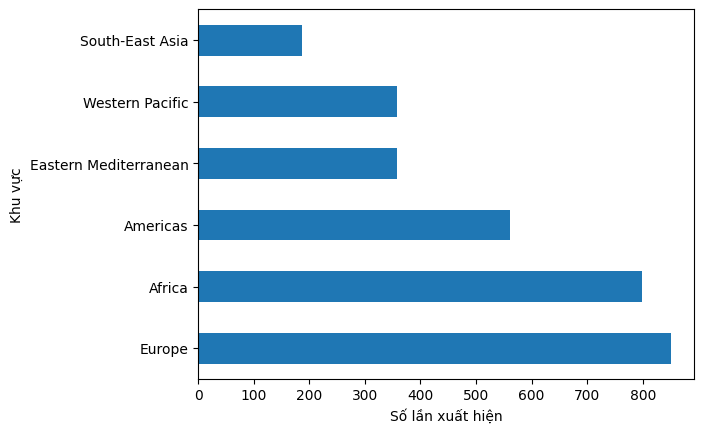

In [11]:
df['region'].value_counts().plot.barh()
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Khu vực')
plt.show()